In [27]:
import pandas as pd

# Load the dataset
url = "E:/Intellihack_Weather_Forecasting/data/customer_behavior_analytcis.csv"  # Replace with the actual path or URL to your dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000 

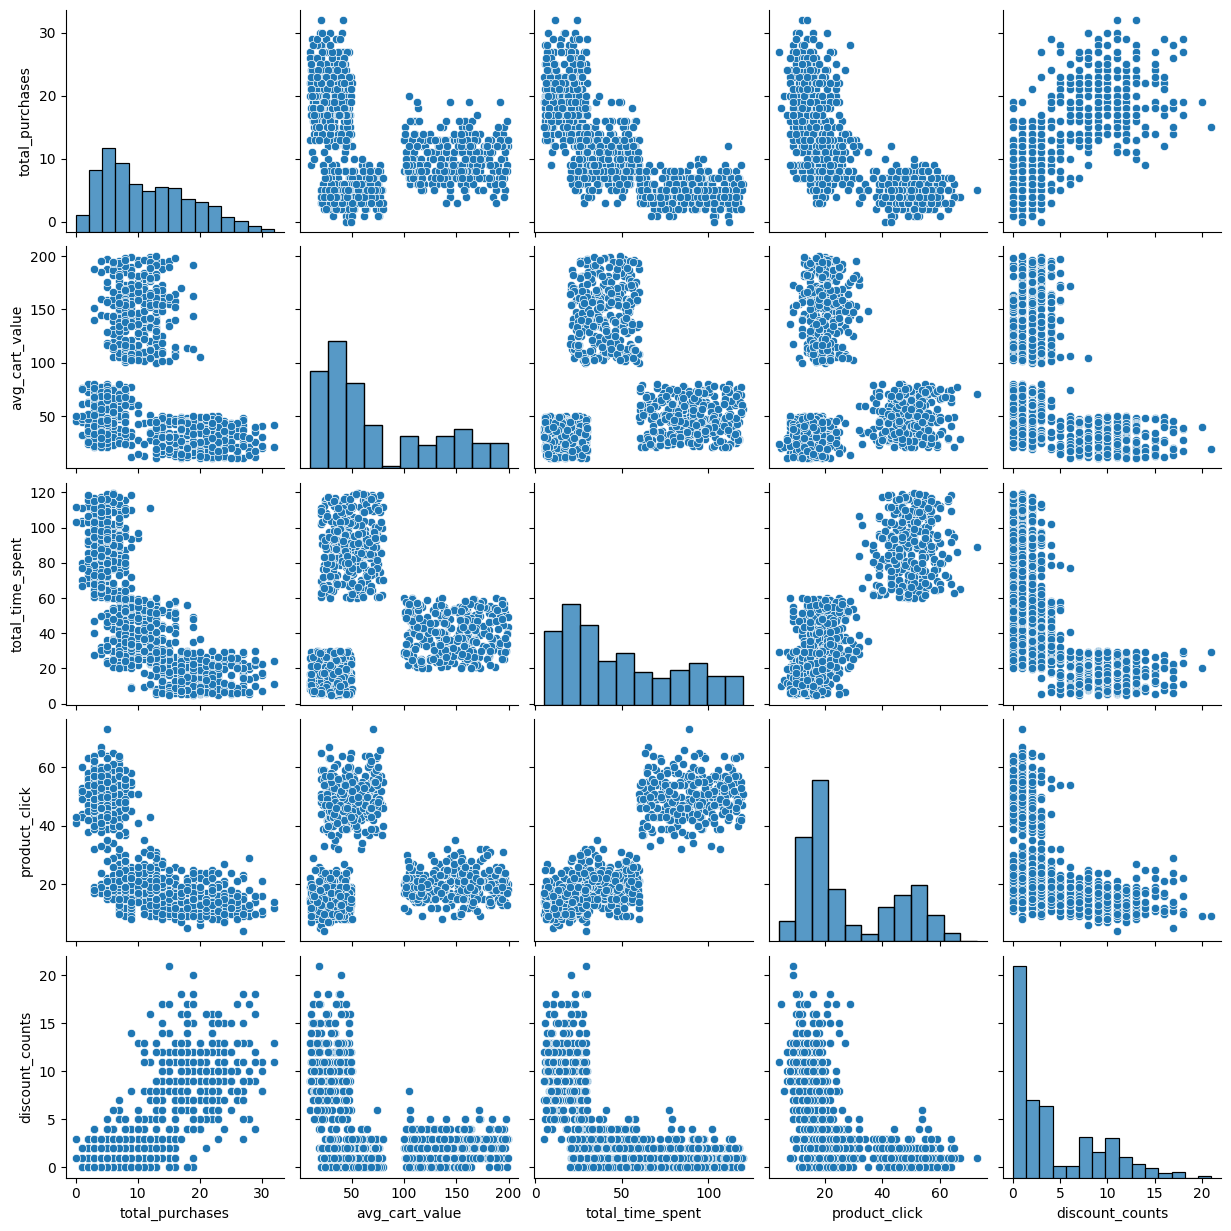

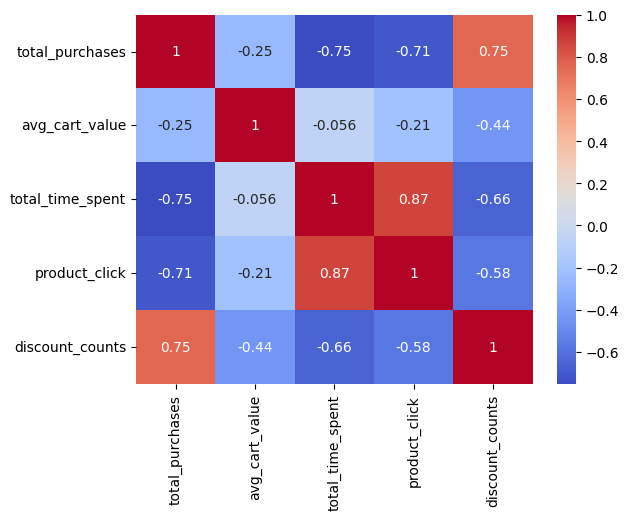

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Pairplot to visualize relationships between features
sns.pairplot(df.drop('customer_id', axis=1))
plt.show()

# Correlation matrix
corr_matrix = df.drop('customer_id', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Drop the customer_id column as it's not needed for clustering
data = df.drop('customer_id', axis=1)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame for easier handling
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

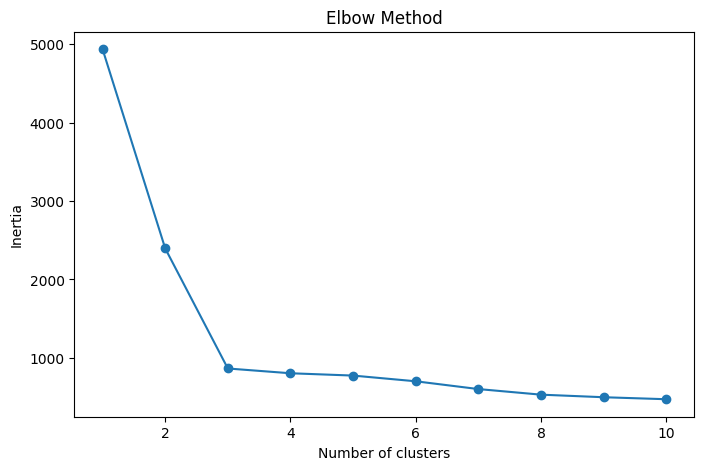

In [30]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Replace NaN values with mean
imputer = SimpleImputer(strategy="mean")
data_scaled = imputer.fit_transform(data_scaled)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [31]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with cluster labels
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  cluster  
0              0.0     CM00000        0  
1              7.0     CM00001        2  
2              2.0     CM00002        1  
3             10.0     CM00003        2  
4              3.0     CM00004        0  


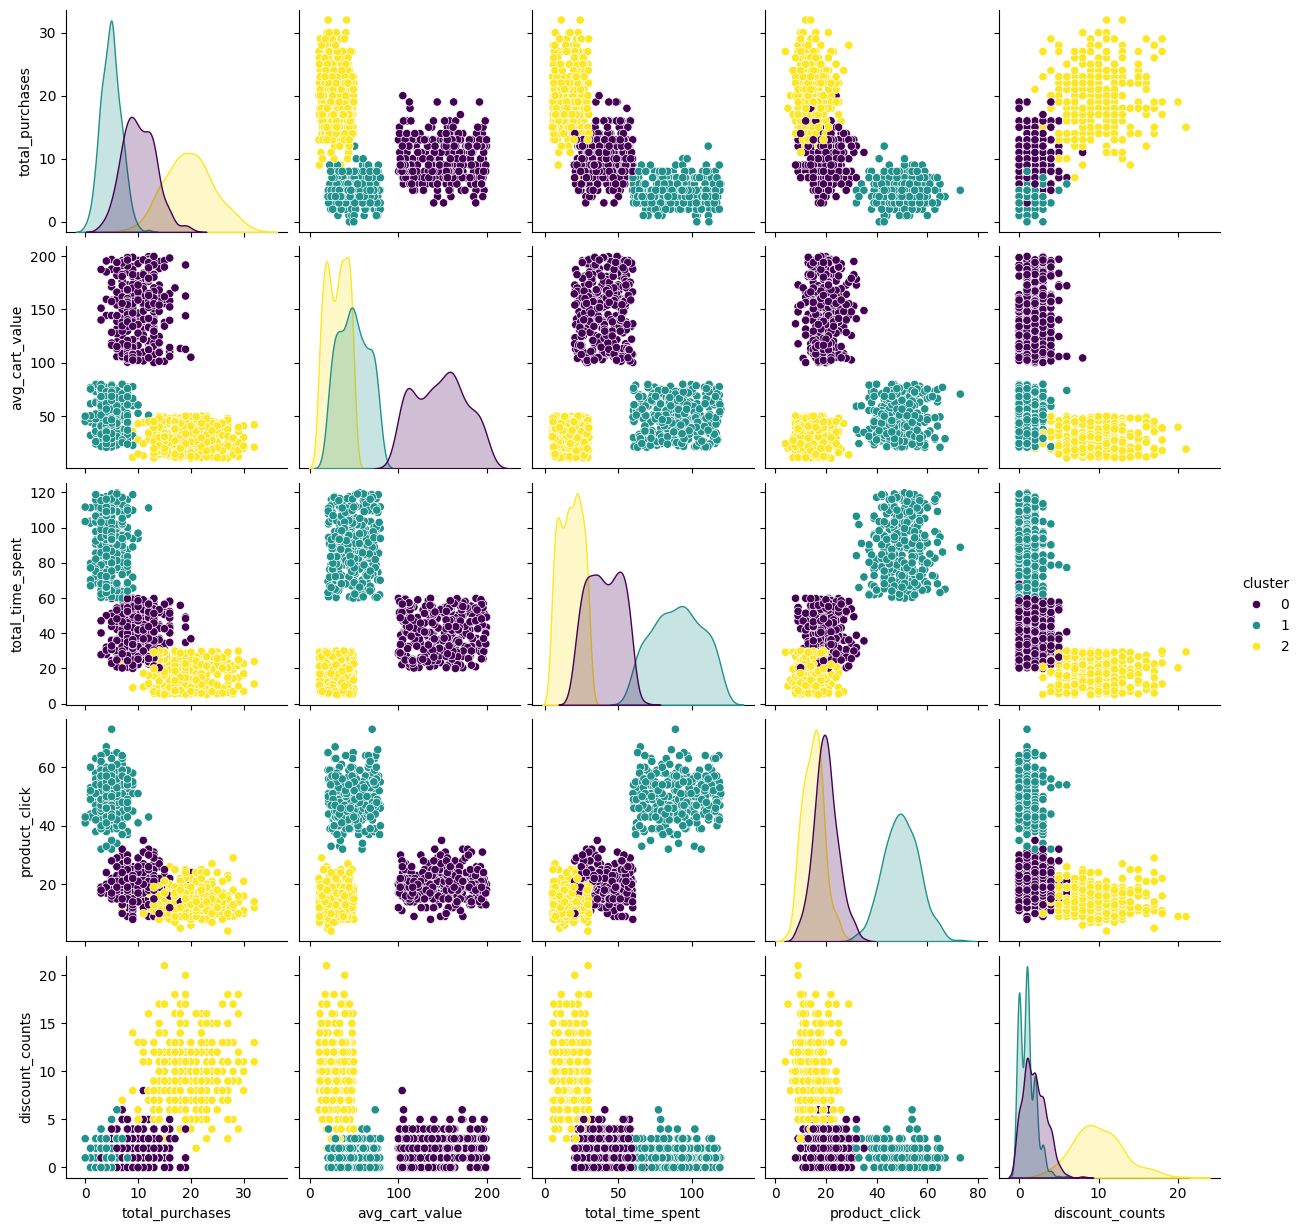

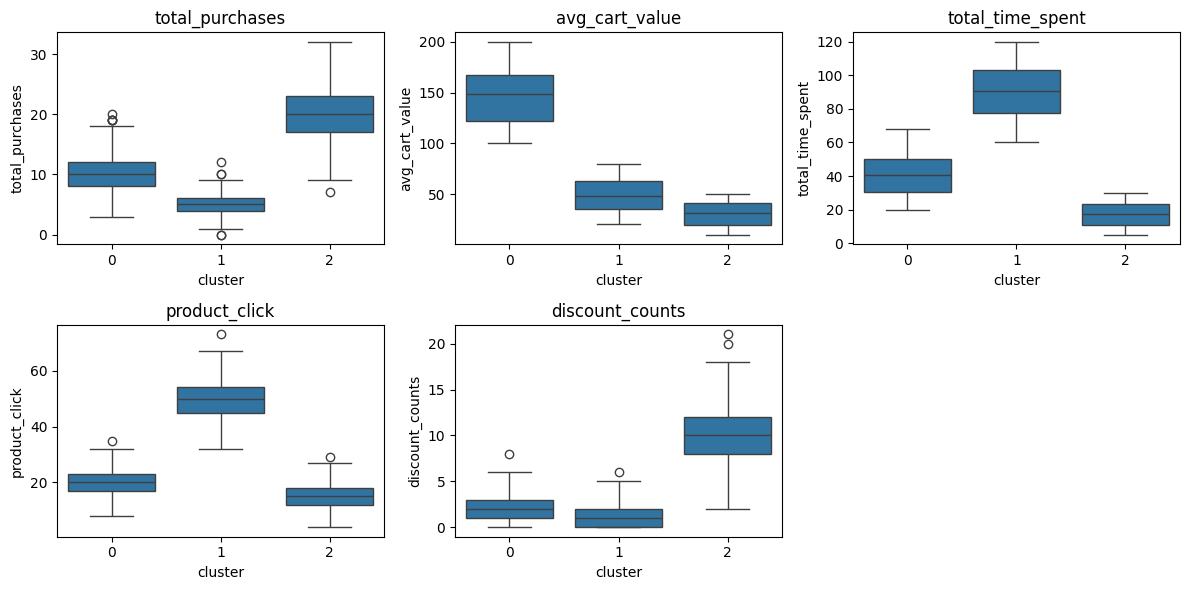

In [32]:
# Pairplot with clusters
sns.pairplot(df.drop('customer_id', axis=1), hue='cluster', palette='viridis')
plt.show()

# Boxplot to see the distribution of features per cluster
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

In [37]:
# Assign cluster labels
cluster_labels = {
    0: 'Bargain Hunters',
    1: 'High Spenders',
    2: 'Window Shoppers'
}

df['cluster_label'] = df['cluster'].map(cluster_labels)

# Display the distribution of clusters
print(df['cluster_label'].value_counts())

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute mean for numeric columns per cluster
print(df.groupby('cluster_label')[numeric_columns.columns].mean()) 


cluster_label
Bargain Hunters    334
Window Shoppers    333
High Spenders      332
Name: count, dtype: int64
                 total_purchases  avg_cart_value  total_time_spent  \
cluster_label                                                        
Bargain Hunters        10.175385      147.327169         40.472126   
High Spenders           4.862805       49.029848         90.211837   
Window Shoppers        19.711656       30.399509         17.511682   

                 product_click  discount_counts  cluster  
cluster_label                                             
Bargain Hunters      19.895385         1.940120      0.0  
High Spenders        49.716463         1.027108      1.0  
Window Shoppers      14.944785         9.969970      2.0  


In [34]:
# Save the DataFrame with cluster labels to a CSV file
df.to_csv('customer_segmentation_results.csv', index=False)

# Save the Jupyter Notebook (this step is manual in Jupyter)